# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gd

In [2]:
videos=pd.read_csv("USvideos.csv")

In [3]:
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
videos.shape

(40949, 16)

In [5]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
videos.drop_duplicates(inplace=True)

In [7]:
videos.shape

(40901, 16)

In [8]:
numerical_col=["views","likes","dislikes","comment_count"]

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
videos[numerical_col].describe()

,views,likes,dislikes,comment_count
count,40901.000,40901.000,40901.000,40901.000
mean,2360678.039,74271.734,3711.722,8448.567
std,7397718.728,228999.928,29046.241,37451.387
min,549.000,0.000,0.000,0.000
25%,241972.000,5416.000,202.000,613.000
50%,681064.000,18069.000,630.000,1855.000
75%,1821926.000,55338.000,1936.000,5752.000
max,225211923.000,5613827.000,1674420.000,1361580.000


From the data there is no requirement of "vedio_id","tags","thumbnail_link","vedioerror_or_removed","description"

Remove the columns

In [10]:
unwanted_col=["video_id","tags","thumbnail_link","video_error_or_removed","description"]
videos.drop(columns=unwanted_col,inplace=True)

In [11]:
videos.head()

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False


In [12]:
category_ids=videos.category_id.unique()
category_ids.sort()
category_ids=category_ids.astype("str")

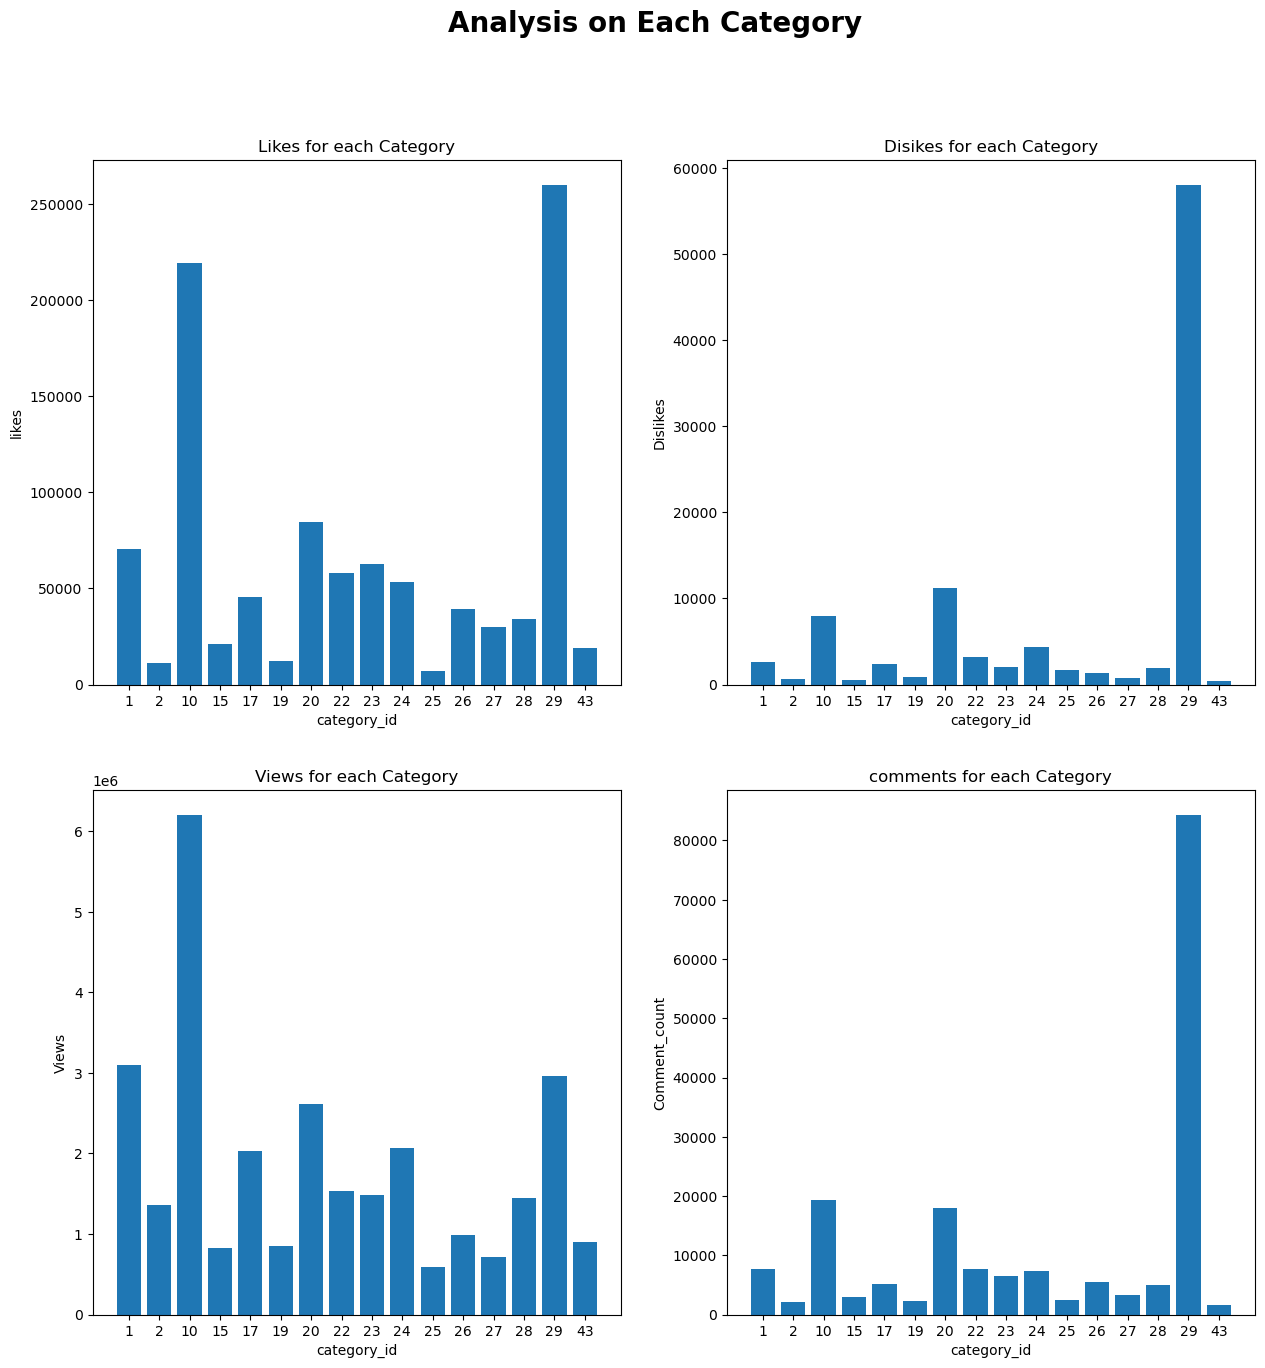

In [13]:
fig=plt.figure(figsize=(15,15))
gs=gd.GridSpec(2,2)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])
ax1.bar(category_ids,videos.groupby("category_id")["likes"].mean())
ax2.bar(category_ids,videos.groupby("category_id")["dislikes"].mean())
ax3.bar(category_ids,videos.groupby("category_id")["views"].mean())
ax4.bar(category_ids,videos.groupby("category_id")["comment_count"].mean())
ax1.set(xlabel="category_id",
        ylabel="likes",
        title="Likes for each Category")
ax2.set(xlabel="category_id",
        ylabel="Dislikes",
        title="Disikes for each Category")
ax3.set(xlabel="category_id",
        ylabel="Views",
        title="Views for each Category")
ax4.set(xlabel="category_id",
        ylabel="Comment_count",
        title="comments for each Category")
fig.suptitle("Analysis on Each Category",fontsize=20,fontweight="bold")
plt.show()

From this we can analyse that vedios of category 10 has high response i.e, more number of likes and views.

Similarly For category 29 it has more likes,dislikes,comments as well along with a some extent no of views.

Also there are few categories which has no impact.

In [14]:
videos.head()

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False


In [15]:
import datetime as datetime
videos["publish_time"]=pd.to_datetime(videos["publish_time"])
videos["publish_time"]=videos["publish_time"].dt.date
video_count=videos.groupby("publish_time").size()
video_count

publish_time
2006-07-23     1
2008-04-05     4
2008-06-17     4
2008-08-07     3
2009-03-10     2
              ..
2018-06-10    25
2018-06-11    36
2018-06-12    14
2018-06-13    11
2018-06-14     1
Length: 313, dtype: int64

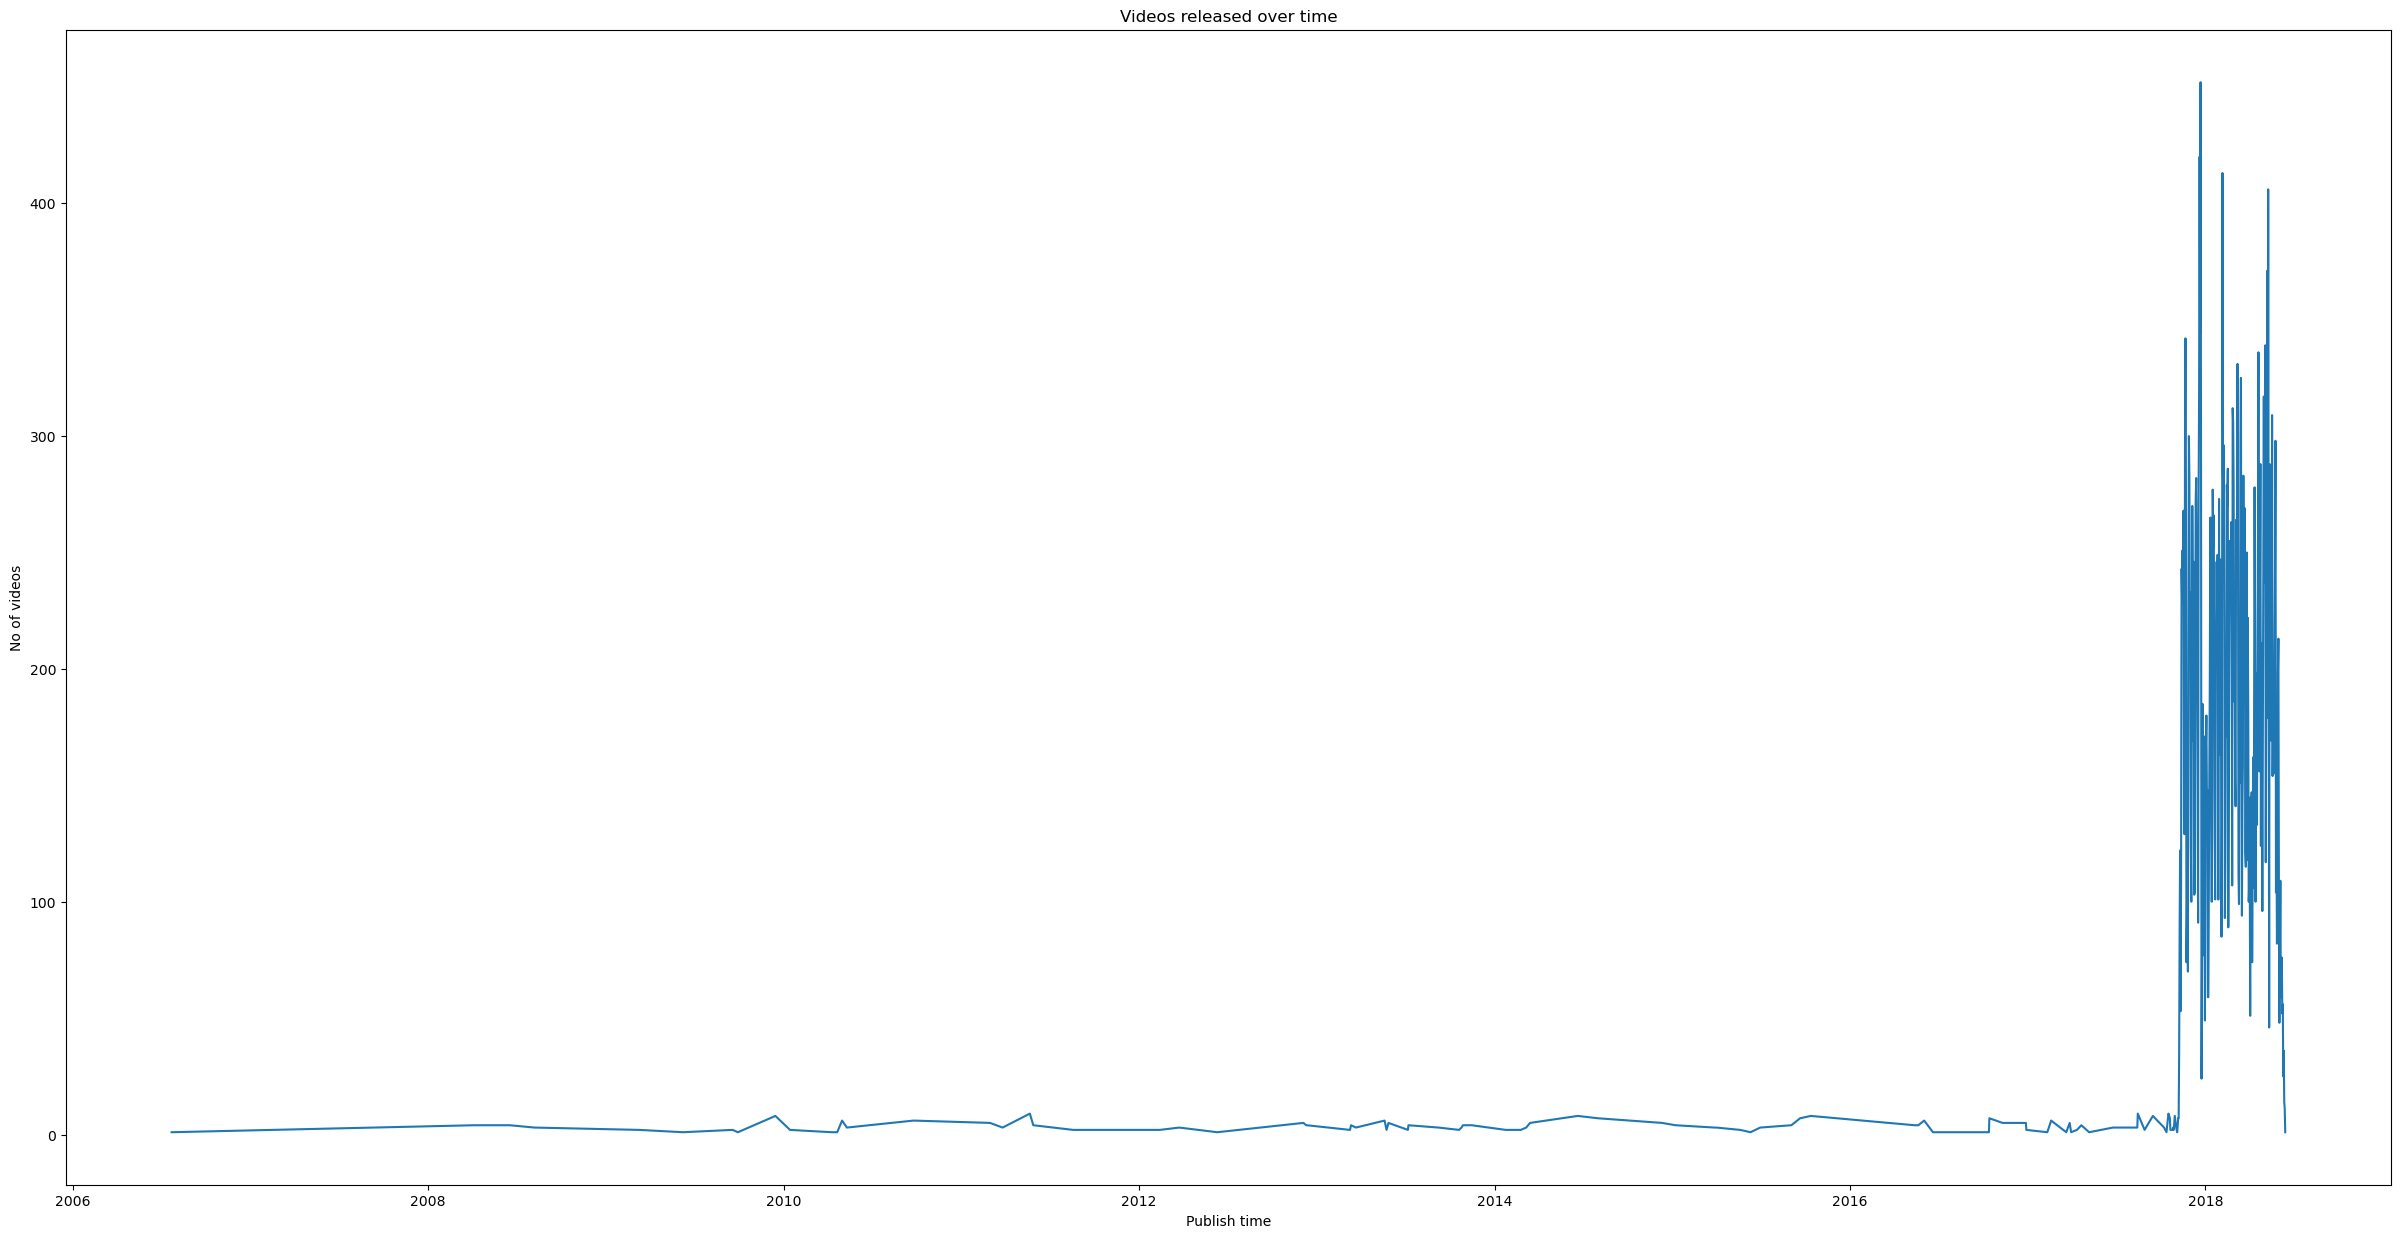

In [16]:
fig,ax=plt.subplots(figsize=(30,15))
ax.plot(video_count)
ax.set(xlabel="Publish time",
       ylabel="No of videos",
       title="Videos released over time")
plt.show()

In [17]:
videos[numerical_col].corr()

,views,likes,dislikes,comment_count
views,1.000,0.849,0.472,0.618
likes,0.849,1.000,0.447,0.803
dislikes,0.472,0.447,1.000,0.700
comment_count,0.618,0.803,0.700,1.000


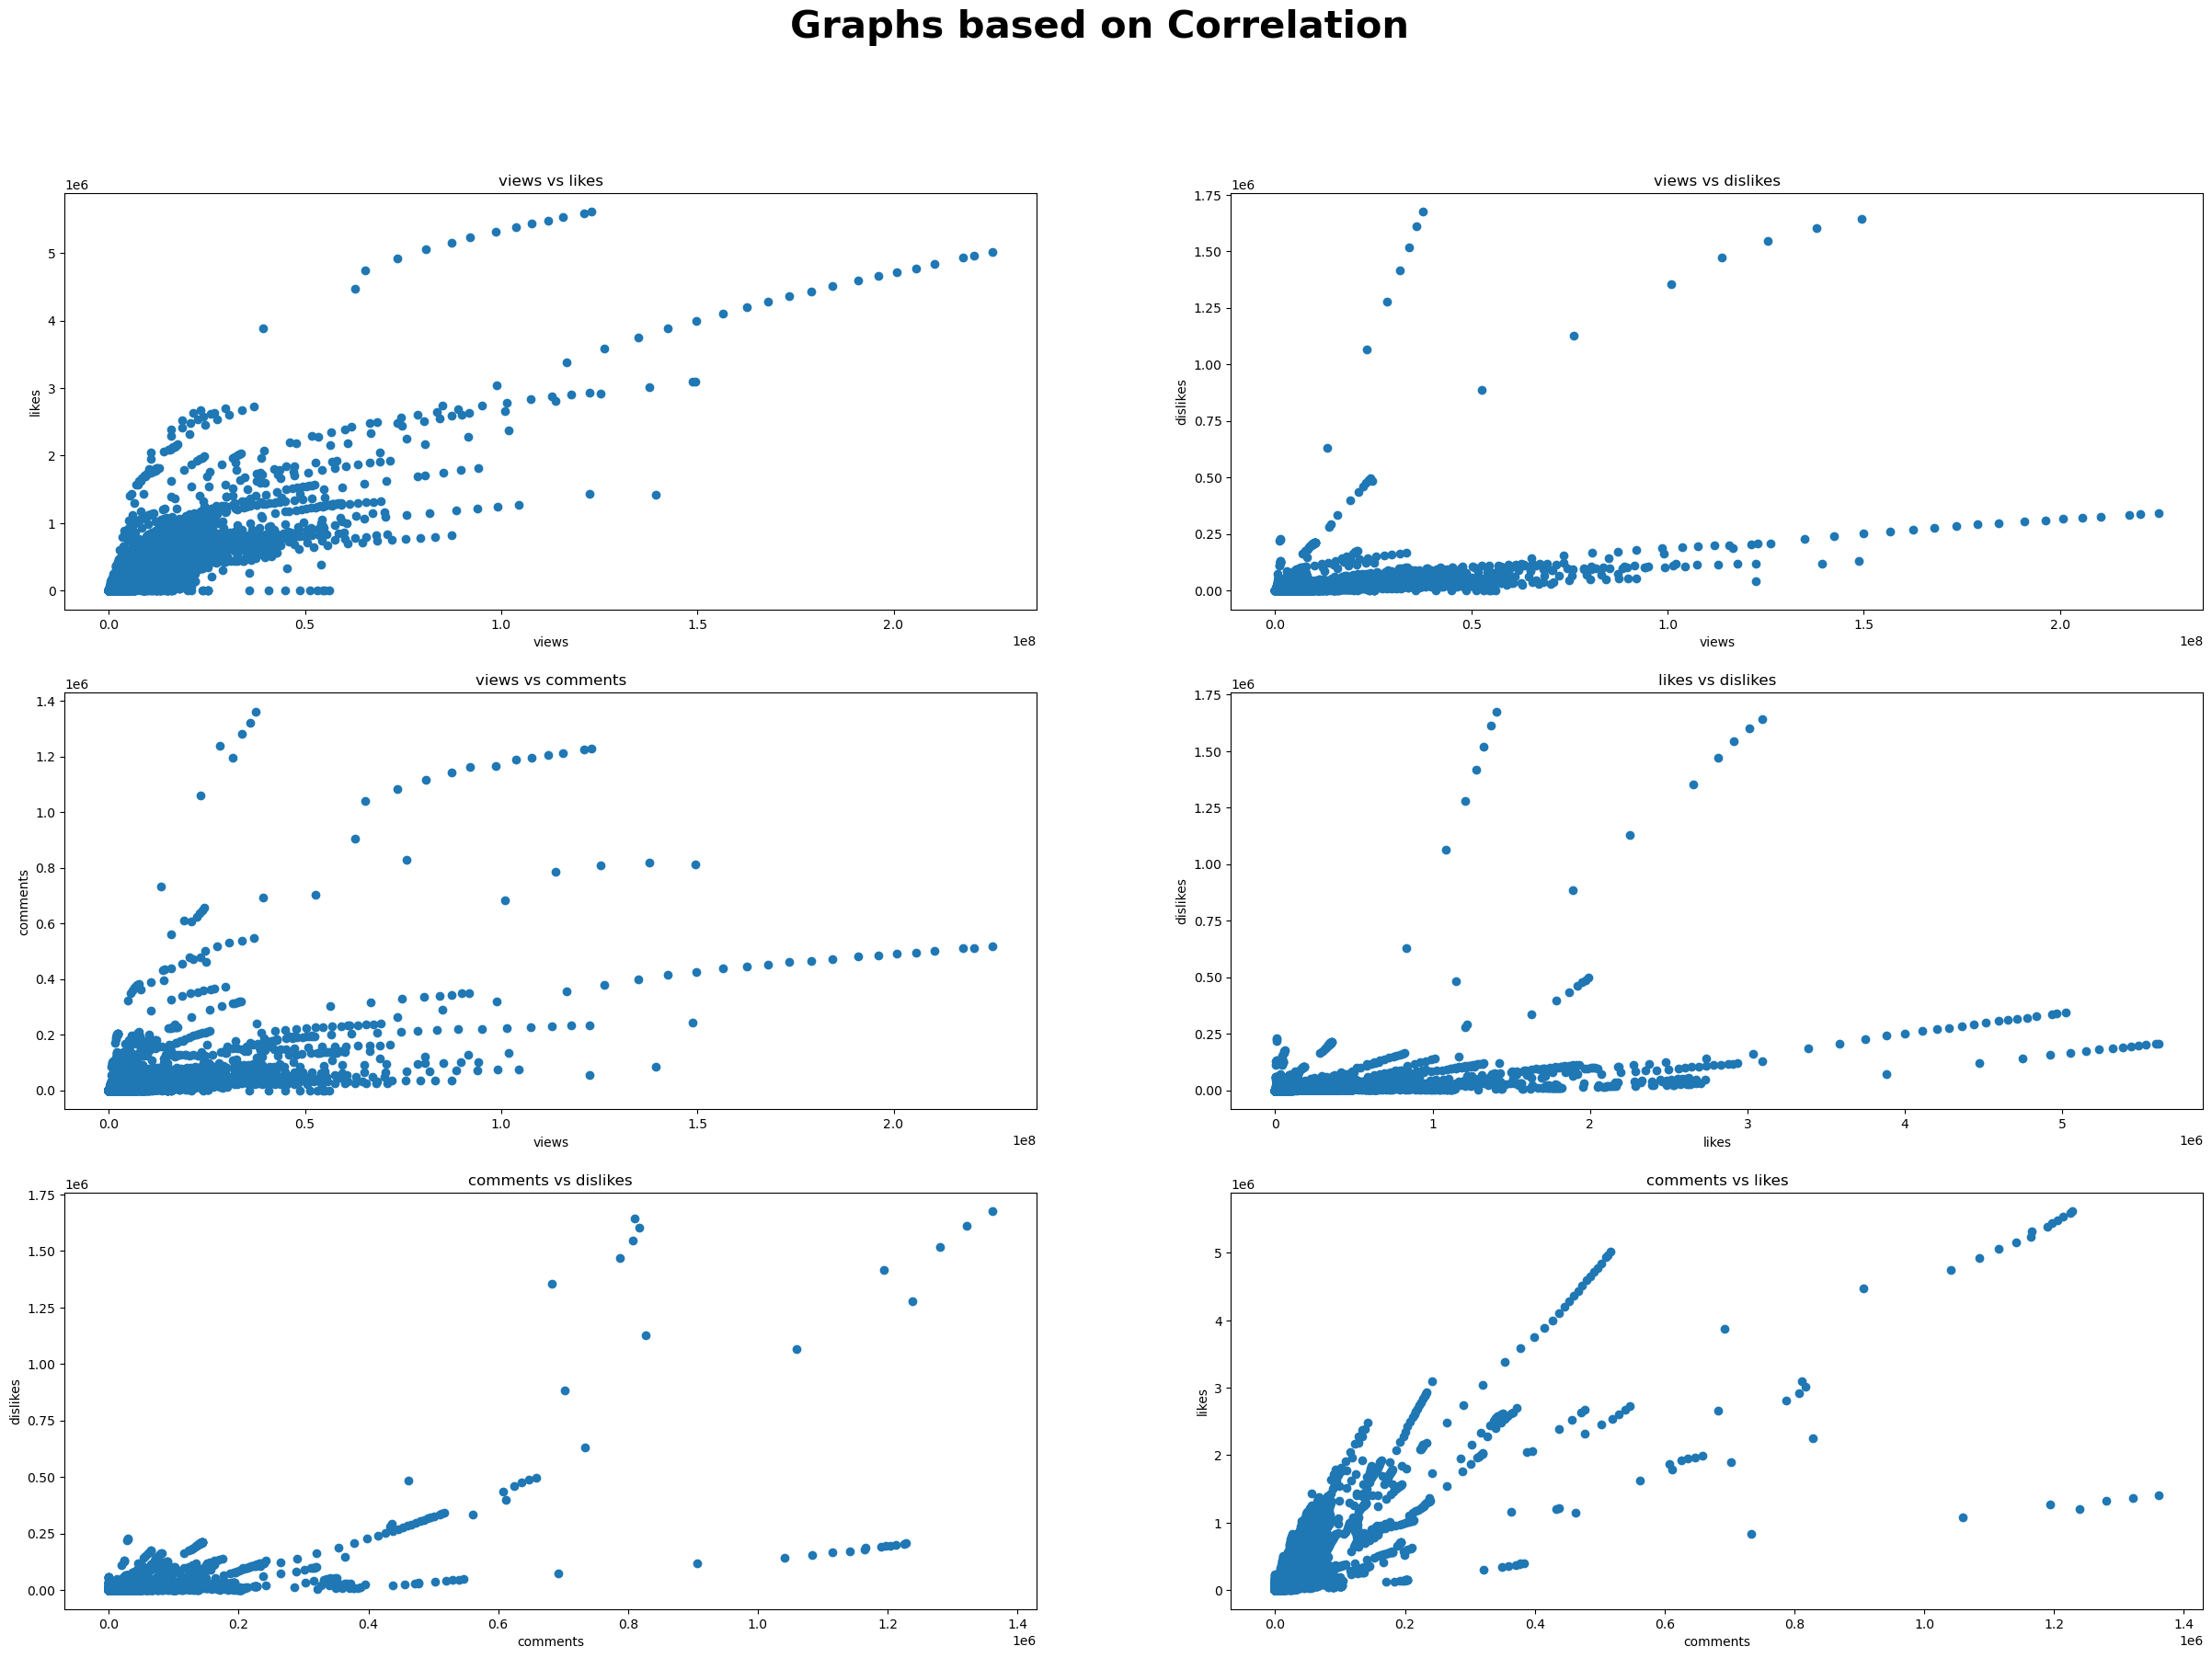

In [18]:
fig=plt.figure(figsize=(30,20))
gs=gd.GridSpec(3,2)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])
ax5=fig.add_subplot(gs[2,0])
ax6=fig.add_subplot(gs[2,1])
ax1.scatter(videos.views,videos.likes)
ax2.scatter(videos.views,videos.dislikes)
ax3.scatter(videos.views,videos.comment_count)
ax4.scatter(videos.likes,videos.dislikes)
ax5.scatter(videos.comment_count,videos.dislikes)
ax6.scatter(videos.comment_count,videos.likes)
ax1.set(xlabel="views",
        ylabel="likes",
        title="views vs likes")
ax2.set(xlabel="views",
        ylabel="dislikes",
        title="views vs dislikes")
ax3.set(xlabel="views",
        ylabel="comments",
        title="views vs comments")
ax4.set(xlabel="likes",
        ylabel="dislikes",
        title="likes vs dislikes")
ax5.set(xlabel="comments",
        ylabel="dislikes",
        title="comments vs dislikes")
ax6.set(xlabel="comments",
        ylabel="likes",
        title="comments vs likes")
fig.suptitle("Graphs based on Correlation",fontsize=30,fontweight="bold")
plt.show()